# Ford GoBike DataSet Exploration
## by Jumba Mark

## 1. Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## 2. Preliminary Wrangling


In [62]:
# import all packages and set plots to be embedded inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

# suppress warnings from final output
warnings.simplefilter("ignore")

* Load the dataset and print the head of the dataset.

In [63]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### 2.1 Data Assesment

Overview of the composition of data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- `start_time` and `end_time` should be datetimestamp data types
- `member_birth_year` should be int
- `start_station_id`, `end_station_id` and `bike_id` should be str

* Printing a concise summary of the dataset.

In [65]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

- There are some weird values in the statistics. First, the max value of duration_sec is 85444 which is far away from other values. Second, the min value of `member_birth_year` is 1878 which is weird. It is not reasonable for a 141-year-old person to have the ability to ride the bike. These two problems will be researched in the exploration step.

Check for null values in the dataset

In [66]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

- Some values in `start_station_id`, `end_station_id`, `member_birth_year` and `member_gender` are missing. The null values should be removed as they do not account for a big amount of data

Checking if there are duplicates

In [67]:
sum(df.duplicated())

0

In [68]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

* `bike_share_for_all_trip` should be a boolean data type

__Check values for categorical data__

In [69]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [70]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

Finding out how many bikes there are in the dataset

In [71]:
df.bike_id.nunique()

4646

### Assessment Summary
1. Erroneous data types (start_time, end_time, member_birth_year, start_station_id, end_station_id, bike_id, user_type, member_gender)
2. Missing  data(start_station_id, start_station_name, member_birth_year, member_gender)
3. Outliers (duration_sec, member_birth_year)

### 2.2 Data Cleaning

In [72]:
# make a copy of the original dataset
df_clean = df.copy()

#### 1. Missing Data
##### Define
* Use the `dropna()` method to drop missing values.
##### Code

In [73]:
# remove the null values
df_clean = df.dropna()

##### Test

In [74]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### 2. Erroneous data types
##### Define
* Use `pd.to_datetime` to convert start_time, end_time datatype to datetime.
* Use `astype(str)` to convert start_station_id, end_station_id, bike_id to str.
* Use `astype('category')` to convert user_type, bike_share_for_all_trip, rental_access_method datatype to category
##### Code

In [75]:
# Use pd.to_datetime to convert datatype to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# Use astype(str) to convert datatype to str
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)

# Use astype('category') to set user type, bike_share_for_all_trip, rental_access_method to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

# change the type of 'member_birth_year'
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

# changing datatype to boolean
df_clean.bike_share_for_all_trip = (df_clean.bike_share_for_all_trip == 'Yes')

##### Test

In [76]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip              bool
dtype: object

* remove the columns that are unrelated to the research question

In [77]:
df_clean.drop(columns=['start_station_id', 'start_station_name','end_station_id', 'end_station_name', 'bike_id'], inplace=True)

#### Dataset Overview

In [78]:
# how many rows and columns
df_clean.shape

(174952, 11)

In [79]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude            float64
start_station_longitude           float64
end_station_latitude              float64
end_station_longitude             float64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip              bool
dtype: object

In [80]:
df_clean.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  174952.000000           174952.000000            174952.000000   
mean      704.002744               37.771220              -122.351760   
std      1642.204905                0.100391                 0.117732   
min        61.000000               37.317298              -122.453704   
25%       323.000000               37.770407              -122.411901   
50%       510.000000               37.780760              -122.398279   
75%       789.000000               37.797320              -122.283093   
max     84548.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  
count         174952.000000          174952.000000      174952.000000  
mean              37.771414            -122.351335        1984.803135  
std                0.100295               0.117294          10.118731  
min               37.317298            -122.453704        1878.000000  
25%               37.770407            -122.411647        1980.000000  
50%               37.781010            -122.397437        1987.000000  
75%               37.797673            -122.286533        1992.000000  
max               37.880222            -121.874119        2001.000000

In [81]:
df_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_latitude  start_station_longitude  end_station_latitude  \
0               37.789625              -122.400811             37.794231   
2               37.769305              -122.426826             37.786375   
3               37.774836              -122.446546             37.773311   
4               37.804562              -122.271738             37.792714   
5               37.770407              -122.391198             37.798014   

   end_station_longitude   user_type  member_birth_year member_gender  \
0            -122.402923    Customer               1984          Male   
2            -122.404904    Customer               1972          Male   
3            -122.444293  Subscriber               1989         Other   
4            -122.248780  Subscriber               1974          Male   
5            -122.405950  Subscriber               1959          Male   

   bike_share_for_all_trip  
0                    False  
2                    False  
3                    False  
4                     True  
5                    False

### What is the structure of your dataset?
> * After cleaning, there are 174952 fordgobike trips with 11 specifications (duration_sec, start_time, end_time, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, user_type, member_birth_year,member_gender, bike_share_for_all_trip). Out of the 11 specifications, 6 are numeric (float and int), 2 are datetime, 2 are category type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

> * __I'm most interested in the following topics:__
    >> - How trip duration is dependent on other specifications from the dataset.
    >> - When are most trips taken in terms of time of day and day of the week?
    >> - How long does the average trip take?
    >> - Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> * I expect that the trip duration is related to certain days of the week and certain months. Also, other features like the distance from the start and end location, user types, genders, and birth years may have an effect on that.

## 2. Univariate Exploration
### 2.1 `duration_sec`
- I'll start by looking at the distribution of the main variable of interest: __duration_sec__

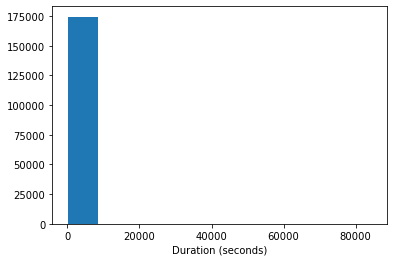

In [82]:
# histogram plot displaying duration_sec
plt.hist(data=df_clean, x='duration_sec')
plt.xlabel('Duration (seconds)');

The histogram shows very high right skweness of the `duration_sec` distribution. There maybe some outliers that need to be cleaned

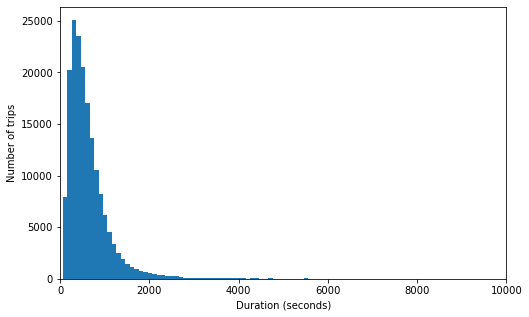

In [83]:
# Adjust the bins and set limit to x
binsize = 100
plt.figure(figsize=[8, 5])
bin_edges = np.arange(61, df_clean['duration_sec'].max()+binsize, binsize)
plt.hist(data=df_clean, x='duration_sec', bins=bin_edges)
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of trips')
plt.xlim(0, 10000)  # set up a limit due to the outliers
plt.show()

In [84]:
# select high outliers, using criteria eyeballed from the plots
high_outliers = ((df_clean['duration_sec'] > 6000))
print(high_outliers.sum())

703


There's a long tail in the distribution, filter for duration > 6000 to remove outliers and plot on a log scale 

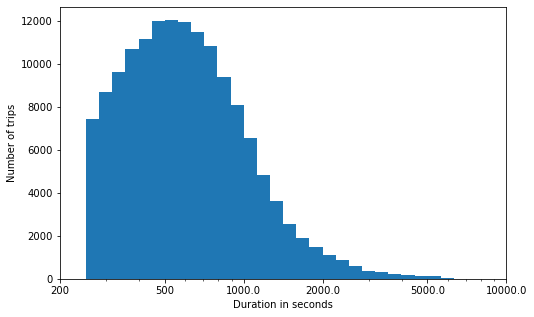

In [85]:
duration_filter = df_clean.query('duration_sec < 6000')
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(duration_filter['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=duration_filter, x='duration_sec', bins=bins)
plt.xscale('log')
# Set ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.
tick_locs = [200, 500, 1e3, 2e3, 5e3, 1e4]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration in seconds')
plt.ylabel('Number of trips')
plt.show()

__Observations__: We cannot deduce much from the first graph probably due to outliers. With a limit value of `1000` seconds in the second plot,we notice that `duration_sec` has a long tailed distribution with a lot of bikes on the short duration end. Outliers on the high end skewed the data. After filtering for duration less than `6000` seconds we notice that the peak is less than `500` seconds

### 2.2 `member_birth_year`

Text(0.5, 0, 'Birth Year')

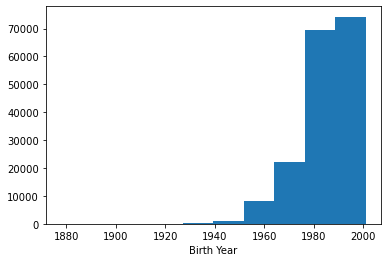

In [86]:
# plot the histogram of birth year
plt.hist(data=df_clean, x='member_birth_year')
plt.xlabel('Birth Year')

There is a small proportion below 1940.

In [87]:
df_clean.query('member_birth_year < 1940').shape

(203, 11)

It's uncommon that people with an age over 80 can ride a bike. The data below 1939 will be filtered out

In [88]:
# filter out the outlier
age_filter = df_clean.query('member_birth_year >= 1939')

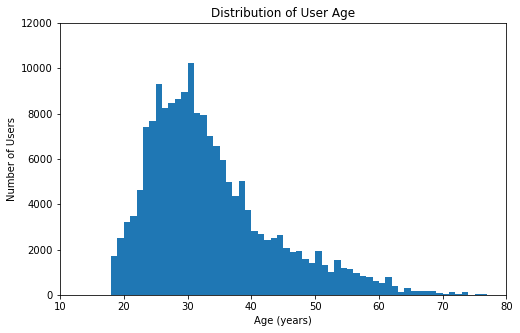

In [89]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=age_filter, x='member_birth_year', bins=bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks(
    [1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009],
    [(2019-1939), (2019-1949), (2019-1959), (2019-1969),(2019-1979), (2019-1989), (2019-1999), (2019-2009)]
)
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

__Observation__: From the above histogram,we can see that the distribution is more concentrated between 25 to 35 years old. There is a steadly decline in usage from age 35 and up.

### 2.3 Location and Distance
- The next step is to discover the pattern of distance. We need to have a look at the distribution of location.

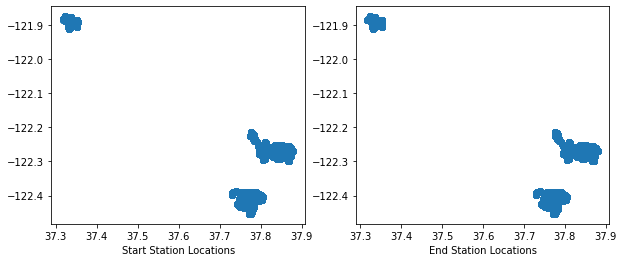

In [90]:
# plot the distribution of location
plt.figure(figsize=[10, 4])

plt.subplot(1, 2, 1)
plt.scatter(data=df_clean, x='start_station_latitude',
            y='start_station_longitude')
plt.xlabel('Start Station Locations')

plt.subplot(1, 2, 2)
plt.scatter(data=df_clean, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Station Locations');

Calculate the distance by doing some feature engineerings

In [91]:
df_clean['distance'] = np.sqrt((df_clean.start_station_longitude - df_clean.end_station_longitude) ** 2 
+ (df_clean.start_station_latitude - df_clean.end_station_latitude) ** 2)

In [92]:
df_clean.distance.describe()

count    174952.000000
mean          0.016937
std           0.010920
min           0.000000
25%           0.009139
50%           0.014211
75%           0.022248
max           0.699399
Name: distance, dtype: float64

Discover the patternof the distance

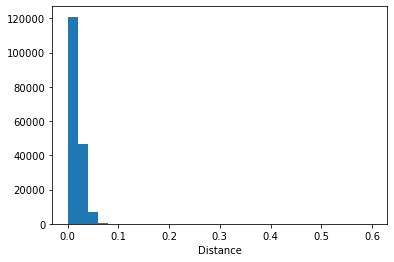

In [93]:
# plot the histogram of the distance
bins = np.arange(0, 0.6+0.02, 0.02)
plt.hist(data=df_clean, x='distance', bins=bins)
plt.xlabel('Distance');

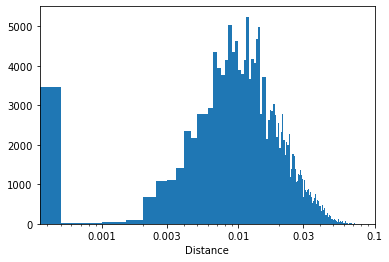

In [94]:
# do the log transformation for the distance
bins = np.arange(0, 0.6+0.0005, 0.0005)
ticks = [0.001, 0.003, 0.01, 0.03, 0.1]

plt.hist(data=df_clean, x='distance', bins=bins)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlim(0, 0.1)
plt.xlabel('Distance');

__Observation__: There are interesting insights from the plot above. In the first section of the plot,there are 10000 observations showing the distance is lower than ``0.0005``.These data indicates that the start and end locations are the same with no movement of longitude and latitude. The remaining data shows a unimodal distribution and the peak is around ``0.015``.

### 2.4 Month, Day and Hour
- Finding out the number of trips in terms of time of the day, day of the week and month of the year.
* These inforamtion needs to be extracted from start_time column to create separate columns for this analysis.

In [95]:
# Create month, dayofweek, hour columns for start date
df_clean['start_month'] = pd.DatetimeIndex(df_clean['start_time']).month
df_clean['start_weekday'] = df_clean.start_time.dt.weekday
df_clean['start_hour'] = df_clean.start_time.dt.hour

# Transform month number to abbrieviated month name, dayofweek number to day name
df_clean['start_month'] = df_clean['start_month'].apply(lambda x: calendar.month_abbr[x])
df_clean['start_weekday'] = df_clean['start_weekday'].apply(lambda x: calendar.day_abbr[x])

Number of bike trips in an hour

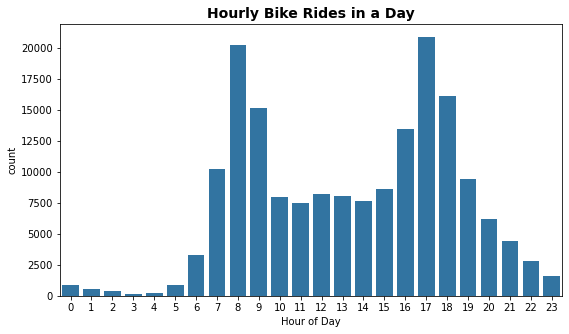

In [96]:
plt.figure(figsize=(9, 5))
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_hour', color=base_color)
plt.title('Hourly Bike Rides in a Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day');

__Observation__: The hourly distribution looks roughly bimodal, with one peak around 8am and the second peak around 5pm. Daily usage rises from 4am and reaches the peak at 8am and decreases dramatically after 9am. Between 10am-2pm, bike usage around 12-1pm is slightly higher. Then from 3pm bike rent demand increases and reaches the second peak around 5pm, then it starts to decrease again.

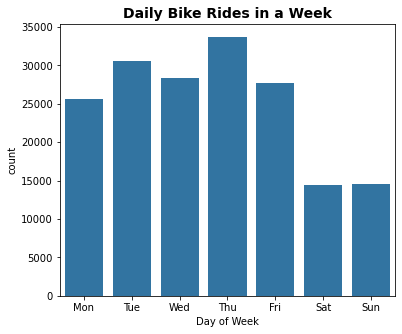

In [97]:
# number of bike trips in a day
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(6, 5))
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_weekday', color=base_color, order=order)
plt.title('Daily Bike Rides in a Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week');

__Observation__: The bikes are used more on weekdays than on weekend.

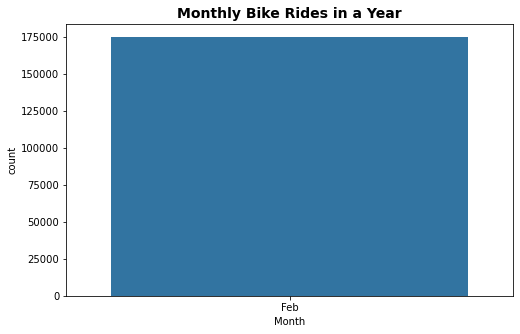

In [98]:
# number of bike trips in a month
plt.figure(figsize=(8, 5))
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_month', color=base_color)
plt.title('Monthly Bike Rides in a Year', fontsize=14, fontweight='bold')
plt.xlabel('Month');

__Observation__: The dataset covers one month only (February)

### 2.5 Other variables
- The final step is to explore categorical variables

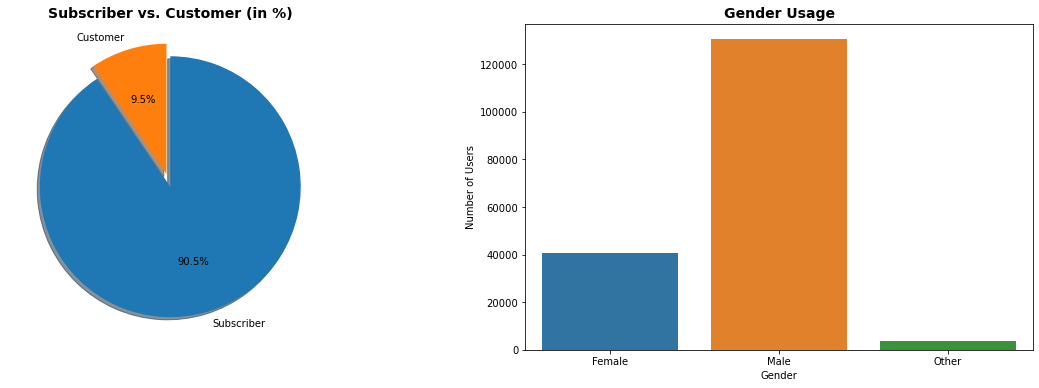

In [99]:
plt.figure(figsize=[20, 6])

# Plot pie chart in %
plt.subplot(1, 2, 1)
explode = (0, 0.1)
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index,autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)
plt.title('Subscriber vs. Customer (in %)', fontsize=14, fontweight='bold');

# barplot of gender usage
plt.subplot(1, 2, 2)
# plt.bar(x=df.member_gender.value_counts().keys(),height=df.member_gender.value_counts())
sb.countplot(data=df_clean, x='member_gender')
plt.title('Gender Usage', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()


__Observation__: The number of male largely exceeds the number of female and other while the number of subscriber largely exceeds that of customer

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. The duration shows a unimodal distribution with a peek around 600s after the log transformation. The duration bigger than 6000s is seen as the outlier and filtered out.
2. The birth year shows that the user born between 1984 and 1994 accounts for the largest proportion. The user aging above 80 is seen as outliers and filtered out.
3. The geographic coordinate is clustered at three locations. By calculating the relative distance, the distance shows a unimodal distribution with a peek around 0.015 under the log transformation. However, there are 10000 observations which are likely to be seen as no location change.
4. Saturday and Sunday show the steep jump in usage.
5. The number of subscribers are much more than that of customers, while the number of males are much more than that of female and other.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* In order to find out usage pattern in terms of time of day and day of the week, I had to plot bike usage for each of the said variables. However, this data is not provided separately. They're all part of start_time. I had to extract day and hour information from start_time and put into separate columns for analysis.
* Birth year is converted by substracting the year from current year so this gives us a distibution for age, this action is performed as age gives a better perception regarding trip duration dependency.
* I had to apply scale transformation to the distribution of trip duration. The data looks highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data looks more like a normal distribution.

## 3. Bivariate Exploration

- In this section the discussion will be centered around pairs of variables
- Let's take a look at the features in the dataset

In [100]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_latitude            float64
start_station_longitude           float64
end_station_latitude              float64
end_station_longitude             float64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip              bool
distance                          float64
start_month                        object
start_weekday                      object
start_hour                          int64
dtype: object

### 3.1 `duration_sec` and Age
- First calculate the correlation then a scatter plot

In [101]:
numeric_vars = ['duration_sec', 'member_birth_year']

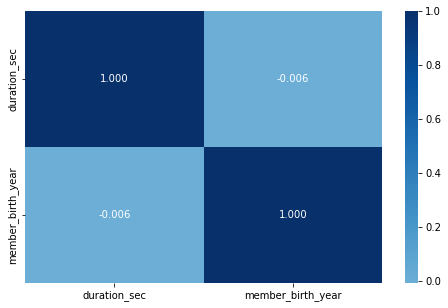

In [102]:
# heatmap to show relationship between variables
plt.figure(figsize=[8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot=True,fmt='.3f', cmap='Blues', center=0)
plt.show()

__Observation__: There's a negative correlation where the age decreases as the trip duration increases

In [103]:
df_clean['age'] = 2019 - df_clean.member_birth_year

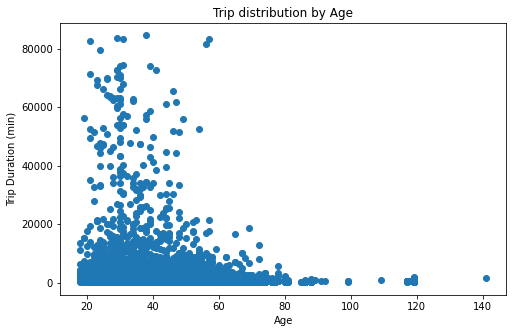

In [104]:
# scatter charts showing distribution between age and trip duration
plt.figure(figsize=[8, 5])
plt.scatter(data=df_clean, x='age', y='duration_sec', alpha=None)
plt.title('Trip distribution by Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (min)')
plt.show()

__Observation__: The concentration of rides are for persons between ages 25 and 45 showing the inverse relationship between age and the trip duration.

### 3.2 `duration_sec` vs `distance`

<AxesSubplot:>

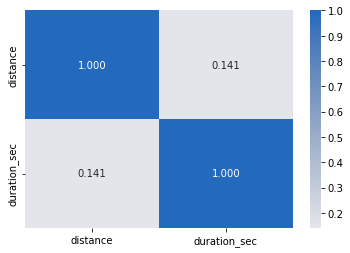

In [105]:
sb.heatmap(df_clean[['distance', 'duration_sec']].corr(), annot=True, fmt='.3f',cmap='vlag_r', center=0)

__Observation__: There's a low correlation between duration and distance indicating that the expectation is wrong

### 3.3 `duration_sec` vs gender

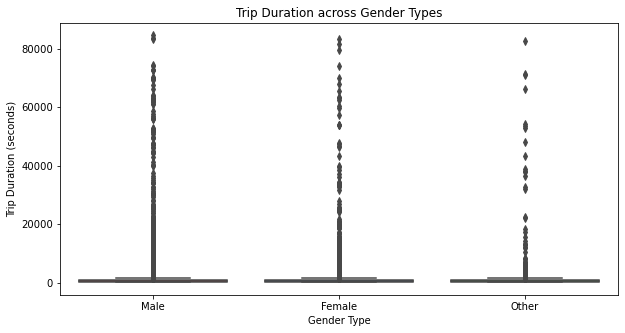

In [106]:
# A box plot showing comparisons between quatitative and categorical variables
plt.figure(figsize=[10, 5])
sb.boxplot(x='member_gender', y='duration_sec', data=df_clean, palette='Set1', order=['Male', 'Female', 'Other'])
plt.title('Trip Duration across Gender Types')
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (seconds)')
plt.show()

Trimming the trip duration y axis values to `2000s` to enable better viewing of the box pot

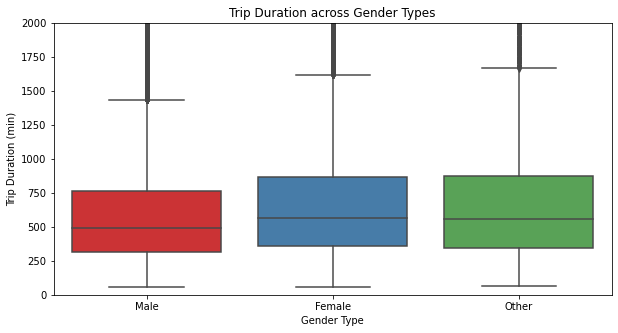

In [107]:
plt.figure(figsize=[10, 5])
sb.boxplot(x='member_gender', y='duration_sec', data=df, palette='Set1', order=['Male', 'Female', 'Other'])
plt.ylim(0, 2000)
plt.title('Trip Duration across Gender Types')
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (min)')
plt.show()

__Observation__: The boxplot does show that female and other gender have a slightly higher trip duration than males.

### 3.4 `duration_sec` vs `user_type`

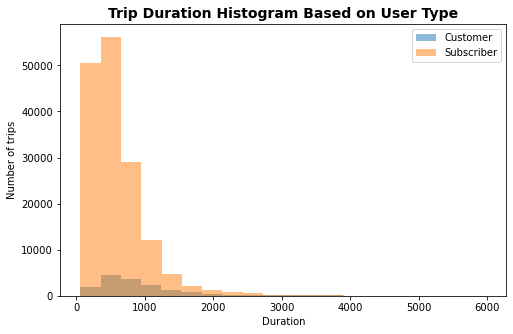

In [108]:
plt.figure(figsize = [8, 5])
filter_data = df_clean.query('duration_sec < 6000')
filter_data.query('user_type =="Customer"').duration_sec.hist(alpha=0.5, bins=20, label='Customer')
filter_data.query('user_type =="Subscriber"').duration_sec.hist(alpha=0.5, bins=20, label='Subscriber')
plt.grid(False)
plt.title('Trip Duration Histogram Based on User Type', fontsize=14, fontweight='bold')
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.legend();

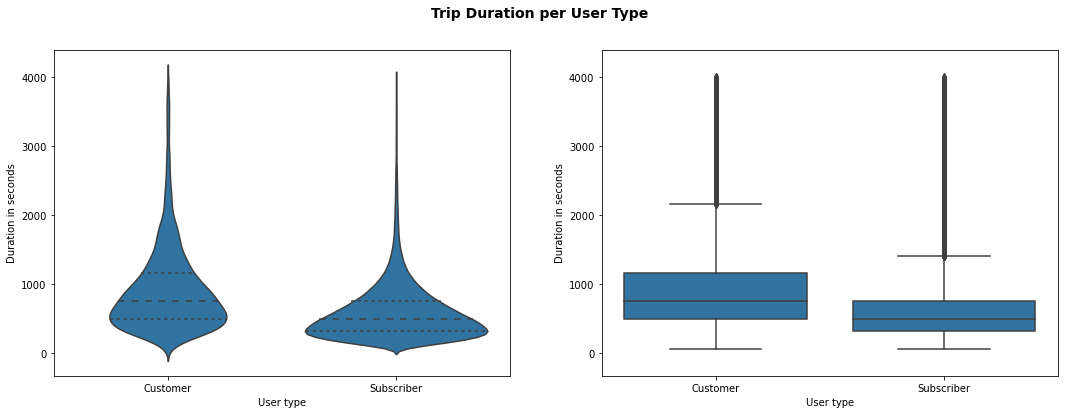

In [109]:
# Set an upper limit of 4000 to remove outliers for the graphs
fig = plt.figure(figsize=[18, 6])
base_color = sb.color_palette()[0]
filter_data = df_clean.query('duration_sec < 4000')

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=filter_data, x='user_type', y='duration_sec', color=base_color,inner='quartile')
plt.xlabel('User type')
plt.ylabel('Duration in seconds')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=filter_data, x='user_type',y='duration_sec', color=base_color)
plt.xlabel('User type')
plt.ylabel('Duration in seconds')
plt.ylim(ax1.get_ylim())  # set y-axis limits to be same as left plot
fig.suptitle('Trip Duration per User Type', fontsize=14, fontweight='bold')
plt.show()


Average trip duration for different user types

(array([0, 1]), [Text(0, 0, 'Customer'), Text(1, 0, 'Subscriber')])

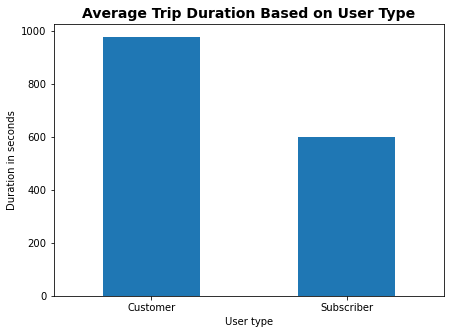

In [110]:
# Set an upper limit of 6000
df_clean.query('duration_sec < 6000').groupby('user_type')['duration_sec'].mean().plot(kind='bar', figsize=(7, 5))
plt.title('Average Trip Duration Based on User Type',fontsize=14, fontweight='bold')
plt.xlabel('User type')
plt.ylabel('Duration in seconds')
plt.xticks(rotation=0)

__Observations__: although subscribers make a lot more trips than customers, customers generally take longer bike trip than subscribers.

### 3.5 `duration_sec` vs `start_hour`, `start_weekday`
- Finding out the average duration of rides per hour/weekday

Text(0, 0.5, 'Avg. duration in sec')

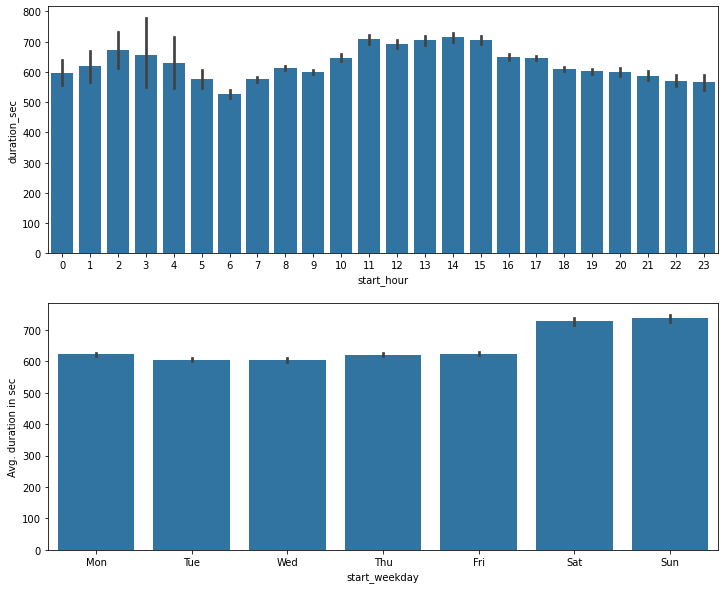

In [111]:
fig, ax = plt.subplots(nrows=2, figsize=[12, 10])
base_color = sb.color_palette()[0]

# hour
sb.barplot(data=df_clean.query('duration_sec <6000'), x='start_hour', y='duration_sec',color=base_color, ax=ax[0])
plt.ylabel('Avg. duration in sec')

# day of week
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.barplot(data=df_clean.query('duration_sec < 6000'), x='start_weekday', y='duration_sec',color=base_color, ax=ax[1], order=order)
plt.ylabel('Avg. duration in sec')

__Observation__: Average ride duration in an hour increases from midnight and reaches the peak at 2am. It's kind of unexpected to see a peak at 2am in the morning though. Then it decreases and rises again from 5am and reach another peak at 2pm with gradual decrease after that until mid-night. Average trip duration during the weekend is longer than that of the weekdays. Average trip duration on Friday is relatively longer than other weekdays. It's easy to understand since people tend to take short trip during workdays, and longer trips during the weekend for leisure purposes.

### 3.6 `user_type` vs. `start_hour`, `start_weekday`
* How does user type affects bike usage(in number of rides)?
* Let's look at relationship between user type and number of bike rides in terms of time of day and day of the week.

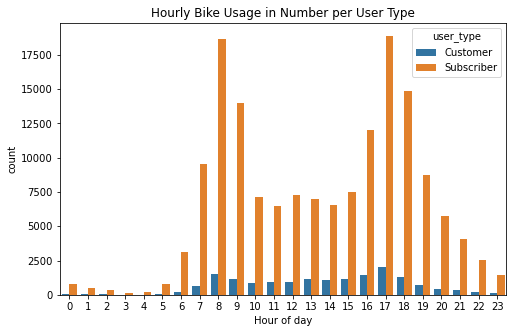

In [112]:
# Number of bike rides per hour per user type
plt.figure(figsize=(8, 5))
sb.countplot(data=df_clean, x='start_hour', hue='user_type')
plt.xlabel('Hour of day')
plt.title('Hourly Bike Usage in Number per User Type');

__Observation__: The daily trend reveals that subscribers have substantial more bike rides than customers and both types look bimodal. But since the two types were plotted on the same scale, it's hard to interpret more about customers.

 Let's facet to plot the two groups again separately on different scale.

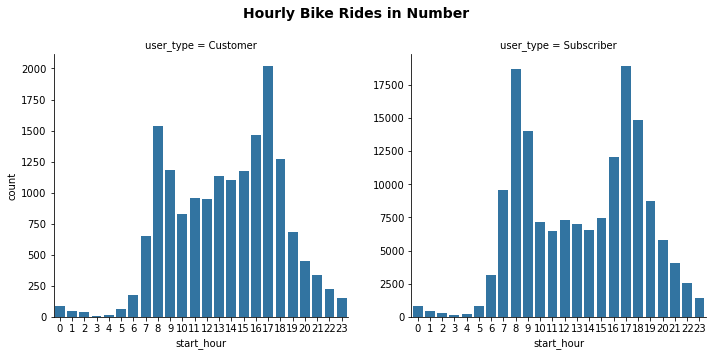

In [113]:
# Use Facet & catplot to plot subscribers and customers on different scale, https://seaborn.pydata.org/generated/seaborn.catplot.html
base_color = sb.color_palette()[0]
sb.catplot(data=df_clean, x='start_hour', col='user_type', kind='count', color=base_color, sharey=False)
plt.subplots_adjust(top=0.85)
plt.suptitle('Hourly Bike Rides in Number', fontsize=14, fontweight='bold');

__Observation__: We can clearly see that subscribers take most of their trips around 8-9am and 4-6pm, typical commute hours. There are less bike rides during 10am-3pm. For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm.

Taking a look at when are most trips taken in terms of day of the week

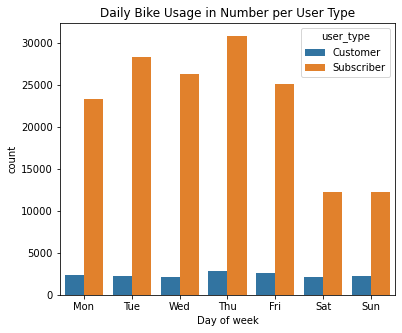

In [114]:
# Number of bike rides per day per user type
plt.figure(figsize=(6, 5))
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=df_clean, x='start_weekday', hue='user_type', order=order)
plt.xlabel('Day of week')
plt.title('Daily Bike Usage in Number per User Type');

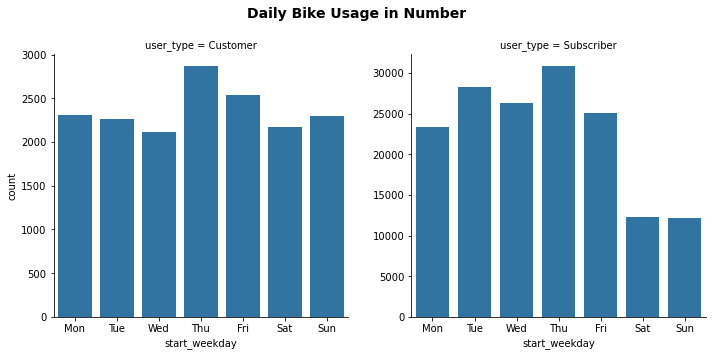

In [115]:
# Use Facet & catplot to plot subscribers and customers on different scale, https://seaborn.pydata.org/generated/seaborn.catplot.html
base_color = sb.color_palette()[0]
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_weekday', col='user_type', kind='count', order=order, color=base_color, sharey=False)
plt.subplots_adjust(top=0.85)
plt.suptitle('Daily Bike Usage in Number', fontsize=14, fontweight='bold');

__Observation__:  Subscribers took more trips during the weekdays and less on weekend probably because they use the bikes more to commute to work/school. The distribution of usage for customer looks relatively constant over the week, with Thursday and Friday higher than other days probably because they are occasional riders.

### 3.7 Categorical vs Categoriacal

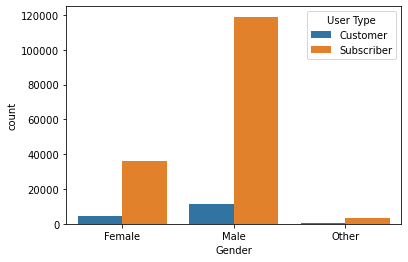

In [116]:
# plot the relationship between user type and gender
sb.countplot(data=df_clean, x='member_gender', hue='user_type')
plt.xlabel('Gender')
plt.legend(title='User Type')

__Observation__: The number of subscriber is much more than that of the customer. The male subscriber shows a very huge proportion of the total sample.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. The duration and distance shows a very low correlation
2. The relationships observed between age and the length of the trip was inversely correlated. The trip duration decreased with an increase in age not surprisingly.
3. By comparing average trip duration for subscribers and customers, we found that although subscribers make a lot more trips than customers, customers generally take longer bike trip than subscribers.
4. Different user types does show different usage(in number of rides) patterns. Subscribers take most of their trips around 8-9am and 4-6pm, typical commute hours to go to work/school and come back home after work/school. For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. Subscribers took more trips during the weekdays and less on weekend. The usage trend for customers is relatively constant during the week but with higher usage on Friday and Sunday.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. It's surprising to see that the average ride duration in an hour increases from midnight and reaches the peak at 2am in the morning. When both user types are combined, we see that bikes are used more on weekdays than on weekend. By separating usage for different user groups, we observed that the usage in number of bike rides and average duration are different for the two user groups.
2. When looking at the relationship between gender members and trip duration I was surprised to find that male had the lowest trip duration.
I also found that among users, an actual customer is spending more time on a bike trip than subscribers.

## 4. Multivariate Exploration

- The two main things to be explored in this part;
1. whether trip durations and frequency depend on if a user is a subscriber or customer
2. relationship between gender, trip duration and age

Looking at the duration for different user types

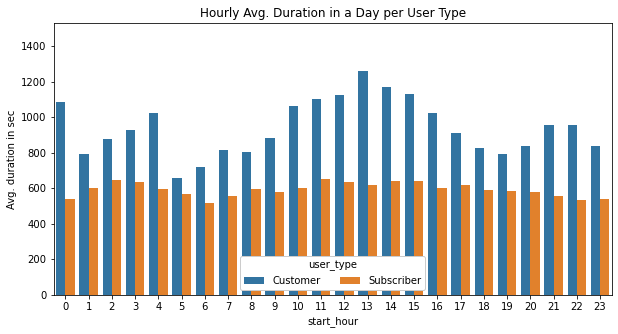

In [117]:
# Two categorical variables and one numeric variable: clustered bar chart using the barplot function
# use "hue" parameter to add a categorical third variable
plt.figure(figsize=(10, 5))
ax = sb.barplot(data=df_clean.query('duration_sec < 6000'),x='start_hour', y='duration_sec', hue='user_type', errwidth=0)
ax.legend(loc=8, ncol=3, framealpha=1, title='user_type')
plt.ylabel('Avg. duration in sec')
plt.title('Hourly Avg. Duration in a Day per User Type');

__Observation__: Hourly avg. duration for customers are longer than subscribers. The average duration for customers is higher between 10am-5pm reaching its peak at 2pm.

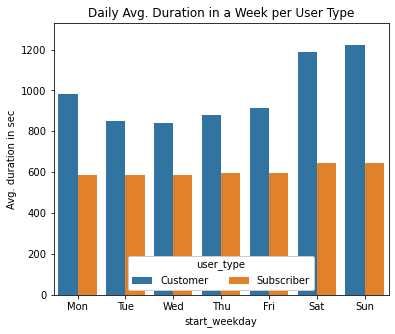

In [118]:
plt.figure(figsize=(6, 5))
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.barplot(data=df_clean.query('duration_sec < 6000'), x='start_weekday', y='duration_sec', hue='user_type', errwidth=0, order=order)
ax.legend(loc=8, ncol=3, framealpha=1, title='user_type')
plt.ylabel('Avg. duration in sec')
plt.title('Daily Avg. Duration in a Week per User Type');

__Observation__: Daily avg. trip duration for customers are longer than subscribers. The weekly pattern is similar for both user type. Both subscribers and customers take longer trips during weekend than weekdays. Customers take longer trips during the weekend.

* Average duration hourly in a week for both user types

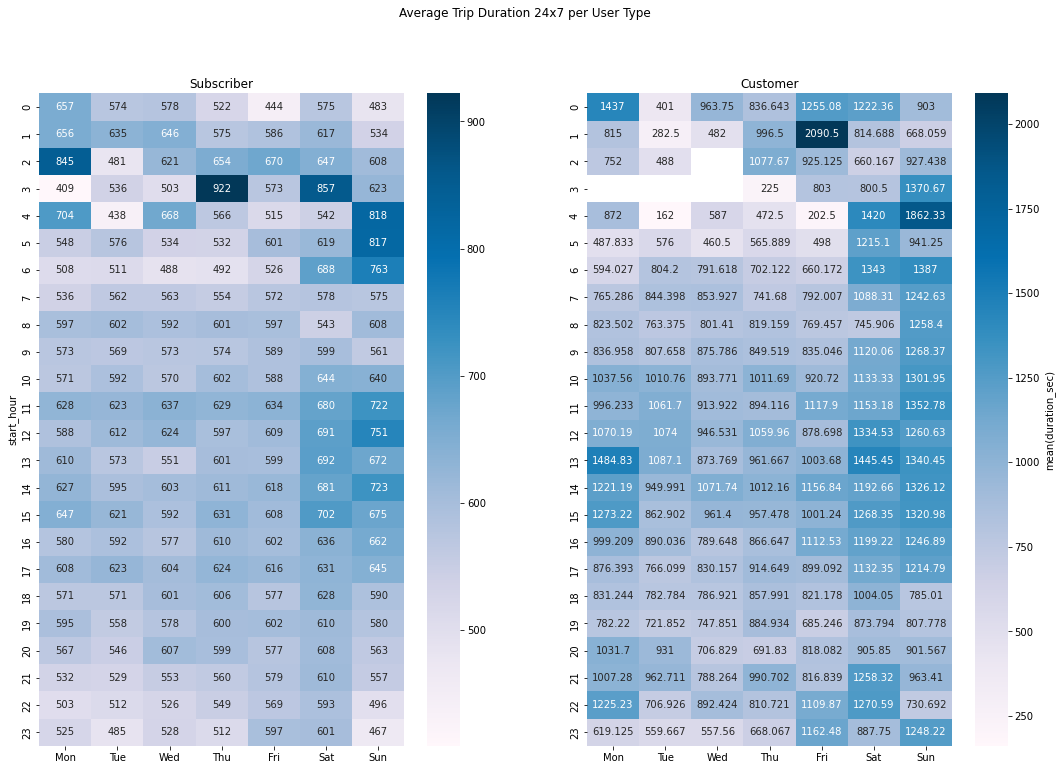

In [119]:
# Average trip duration for 24x7
# Setting the weekday order, https://stackoverflow.com/questions/35193808/re-order-pandas-series-on-weekday
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
plt.figure(figsize=(18, 12))
df_clean['start_weekday'] = pd.Categorical(df_clean['start_weekday'],categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
filter_data = df_clean.query('duration_sec < 6000')

# left plot: subscriber
plt.subplot(1, 2, 1)
duration_means_s = filter_data.query('user_type == "Subscriber"').groupby(['start_weekday', 'start_hour']).mean().astype(int)['duration_sec']
duration_means_s = duration_means_s.reset_index(name='duration_sec_avg')
duration_means_s = duration_means_s.pivot(index='start_hour', columns='start_weekday', values='duration_sec_avg')
ax1 = sb.heatmap(duration_means_s, cmap='PuBu', annot=True,fmt='g', annot_kws={"size": 10})
plt.xlabel('')
plt.title('Subscriber')
ax1.set_ylim(23.5 + 0.5, 0.5 - 0.5)  # ax1.get_ylim() -- (23.5, 0.5)
#https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

# right plot: customer
plt.subplot(1, 2, 2)
duration_means_c = filter_data.query('user_type == "Customer"').groupby(['start_weekday', 'start_hour']).mean().astype(int, errors='ignore')['duration_sec']
duration_means_c = duration_means_c.reset_index(name='duration_sec_avg')
duration_means_c = duration_means_c.pivot(index='start_hour', columns='start_weekday', values='duration_sec_avg')
ax2 = sb.heatmap(duration_means_c, cmap='PuBu', annot=True, fmt='g', cbar_kws={'label': 'mean(duration_sec)'}, annot_kws={"size": 10})
plt.xlabel('')
plt.ylabel('')
plt.title('Customer')
plt.suptitle('Average Trip Duration 24x7 per User Type')
plt.ylim(ax1.get_ylim());    # set y-axis limits to be same as left plot

__Observations__
1. Again, it's clear to see that customers take longer trips than subscribers in general. Subscribers take short trips during the weekday and longer rides during the weekend. During the weekend, they tend to make longer rides from 10am to 5pm, with noon to early afternoon when most long trips happened.
2. Similarly, customers take longer trips at weekend than weekdays but they are not as sensitive to weekdays as subscribers. They tend to take longer trips from 10am to 4pm during the week.

Let's plot another heatmap to see when are most bike rides take place in hour of day in a whole week for different user types.

(24.0, 0.0)

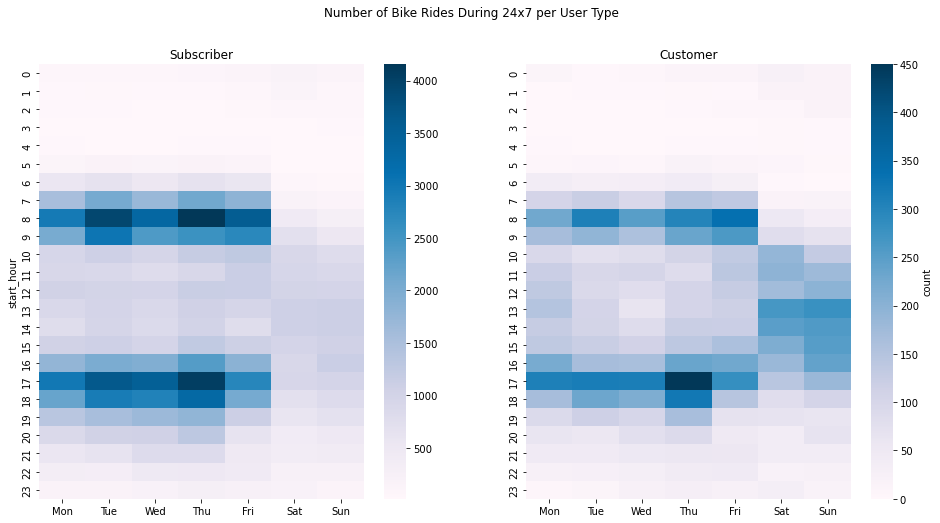

In [120]:
# Number of bike rides taken place during 24x7
plt.figure(figsize=(16, 8))
df_clean['start_weekday'] = pd.Categorical(df_clean['start_weekday'],categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
filter_data = df_clean.query('duration_sec < 6000')

# left plot: subscriber
plt.subplot(1, 2, 1)
rides_count_s = filter_data.query('user_type == "Subscriber"').groupby(['start_weekday','start_hour']).size().astype(int)
rides_count_s = rides_count_s.reset_index(name='count')
rides_count_s = rides_count_s.pivot(index='start_hour', columns='start_weekday',values='count')
ax1 = sb.heatmap(rides_count_s, cmap='PuBu')
plt.xlabel('')
plt.title('Subscriber')
ax1.set_ylim(23.5 + 0.5, 0.5 - 0.5)  # ax1.get_ylim() -- (23.5, 0.5)

# right plot: customer
plt.subplot(1, 2, 2)
rides_count_c = filter_data.query('user_type == "Customer"').groupby(['start_weekday','start_hour']).size().astype(int)
rides_count_c = rides_count_c.reset_index(name='count')
rides_count_c = rides_count_c.pivot(index='start_hour', columns='start_weekday',values='count')
ax2 = sb.heatmap(rides_count_c, cmap='PuBu', cbar_kws={'label': 'count'})
plt.xlabel('')
plt.ylabel('')
plt.title('Customer')
plt.suptitle('Number of Bike Rides During 24x7 per User Type')
plt.ylim(ax1.get_ylim())    # set y-axis limits to be same as left plot

__Observations__:  The heatmap for different user types strengthened the results we've discussed eariler in the bivariate exploration section. Different user types show different usage(in number of rides) patterns. Subscribers take most of their trips during weekdays around 7-9am(peak at 8am) and 4-6pm(peak at 5pm). For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. The usage trend for customers is relatively constant during the week but with higher usage on the weekend.

Relationship between gender, trip duration and age

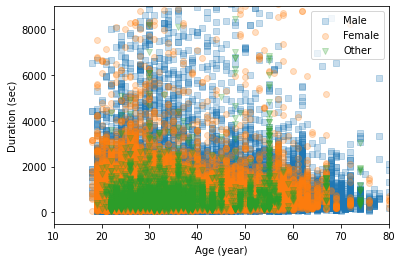

In [121]:
gender_markers = [['Male', 's'], ['Female', 'o'], ['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = df_clean[df_clean['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker=marker, alpha=0.25)
plt.legend(['Male', 'Female', 'Other'])
plt.axis([10, 80, -500, 9000])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show();

separating the genders into different graphs to show a clear picture

<Figure size 1080x720 with 0 Axes>

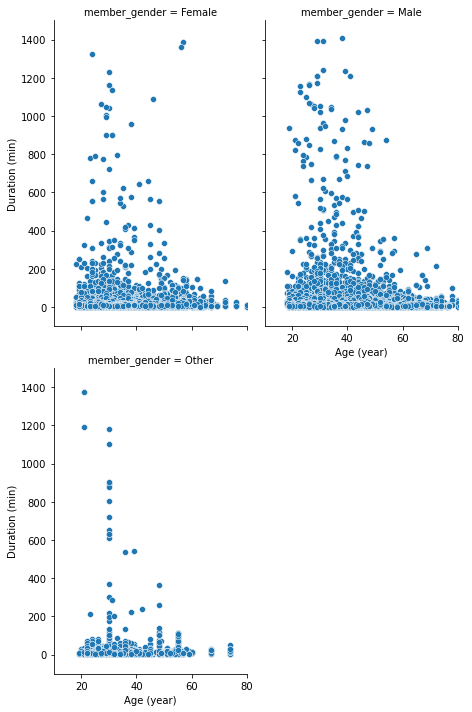

In [122]:
plt.figure(figsize=[15, 10])
df_clean['duration_minutes'] = df_clean['duration_sec']/60
g = sb.FacetGrid(data=df_clean, col='member_gender', col_wrap=2,height=5, aspect=0.65, xlim=[10, 80], ylim=[-100, 1500])
g.map_dataframe(sb.scatterplot, 'age', 'duration_minutes')
g.set_axis_labels('Age (year)', 'Duration (min)')
g.add_legend()
plt.show();

__Observation__: Comparing the gender types as it relates to trip duration, the age 20 to 40 represents the group that does most of the rides. Females and males do appear to have similar ride average

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This part of analysis strengthened many facts that we've discovered in our earlier analysis. Average ride duration in hour and day all confirm that customers take longer trips than subscribers. Both subscribers and customers take longer trips during weekend than weekdays. Houly average duration for customers are higher between 10am-5pm reaching its peak at 2pm. Subscribers take most of their trips during weekdays around 7-9am(peak at 8am) and 4-6pm(peak at 5pm) which is typical commute hours. For customers, 8am-6pm is the popular time period to rent the bike. Bike usage for customers has one peak at 5pm and another peak at 8am, which is much less than the peak at 5pm. The usage trend for customers is relatively constant during the week but with higher usage on the weekend.

### Were there any interesting or surprising interactions between features?

In the bivariate exploration section, we were surprised to see that the hourly average duration increases from midnight and reaches the peak at 2am in the morning. By plot heatmap for serparate user groups, we see large average duration means on Tuesday to Friday 2am and 4-6am Sunday for subscribers. There are some large duration means that occured on Monday to Thursday before 4am and some on weekend before 5am.

## References
1. [https://www.kaggle.com/code/chirag02/ford-gobike-data-analysis/notebook](https://www.kaggle.com/code/chirag02/ford-gobike-data-analysis/notebook)
2. [https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name](https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name)
3. [https://stackoverflow.com/questions/48511484/data-type-conversion-error-valueerror-cannot-convert-non-finite-values-na-or](https://stackoverflow.com/questions/48511484/data-type-conversion-error-valueerror-cannot-convert-non-finite-values-na-or) 
4. https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
5. https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
6. https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
7. https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
8. https://stackoverflow.com/questions/53548973/remove-background-plot-lines-in-pyplot-hist
9. https://seaborn.pydata.org/generated/seaborn.catplot.html
10. https://stackoverflow.com/questions/35193808/re-order-pandas-series-on-weekday
11. https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
12. https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby